In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# Loading the Iris dataset
iris = load_iris()

# Converting to a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Adding the target (species) as a categorical column
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Display the first few rows
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
None


In [3]:
print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [4]:
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [14]:
# grouping by species and computing the mean of each numerical column
grouped_means = df.groupby('species', observed=False).mean(numeric_only=True)

print(grouped_means)

            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                              
setosa                  5.006             3.428              1.462   
versicolor              5.936             2.770              4.260   
virginica               6.588             2.974              5.552   

            petal width (cm)  
species                       
setosa                 0.246  
versicolor             1.326  
virginica              2.026  


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Sepal Length (cm)')

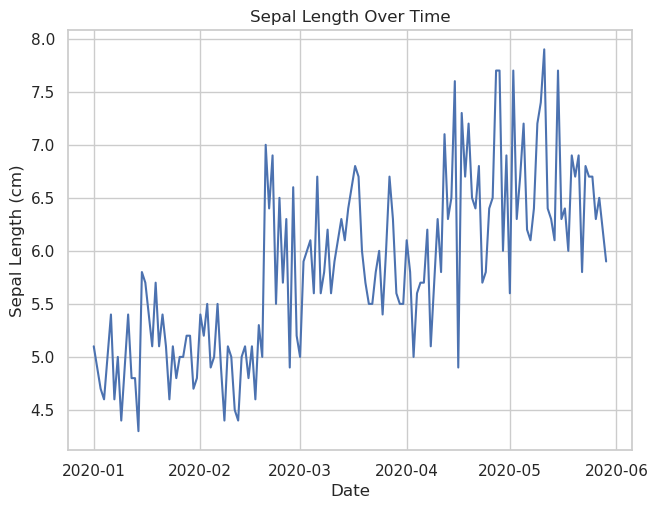

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# simulating time data for a line chart
df['date'] = pd.date_range(start='2020-01-01', periods=len(df), freq='D')

# plot style set up
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

# Line chart - sepal length over time
plt.subplot(2, 2, 1)
sns.lineplot(x='date', y='sepal length (cm)', data=df)
plt.title('Sepal Length Over Time')
plt.xlabel('Date')
plt.ylabel('Sepal Length (cm)')                           


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0, 0.5, 'Average Petal Length (cm)')

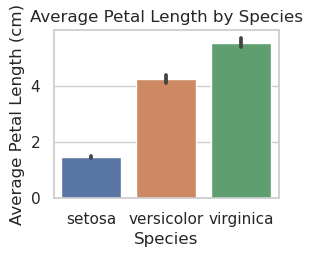

In [9]:
# bar chart - average petal length per species
plt.subplot(2, 2, 2)
sns.barplot(x='species', y='petal length (cm)', data=df, estimator=np.mean)
plt.title('Average Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Average Petal Length (cm)')

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

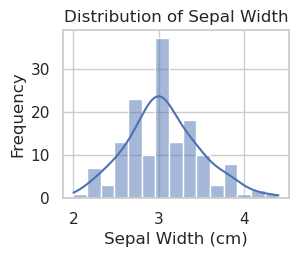

In [11]:
# Histogram - Distribution of sepal width
plt.subplot(2, 2, 3)
sns.histplot(df['sepal width (cm)'], bins=15, kde=True)
plt.title('Distribution of Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')

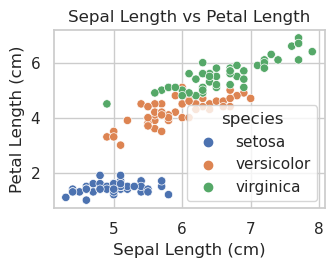

In [12]:
# Scatter Plot - Sepal Length vs Petal Length by Species
plt.subplot(2, 2, 4)
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='species', data=df)
plt.title('Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')

plt.tight_layout()
plt.show()